In [2]:
import torch
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [3]:
# Device
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"
print("Device Selected:", device)

Device Selected: mps


In [4]:
SEED = 1
torch.manual_seed(SEED)

if device == 'cuda':
    torch.cuda.manual_seed(SEED)

In [5]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [6]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

In [7]:
batch_size = 64

kwargs = {'batch_size': batch_size, 'num_workers': 4, 'pin_memory': True}

train_loader = torch.utils.data.DataLoader(train_data, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, shuffle=False, **kwargs)

In [10]:
from model import Model2 as Net

model = Net()
model.summary(input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 28, 28]              90
              ReLU-2           [-1, 10, 28, 28]               0
         MaxPool2d-3           [-1, 10, 14, 14]               0
            Conv2d-4           [-1, 16, 14, 14]           1,440
              ReLU-5           [-1, 16, 14, 14]               0
            Conv2d-6           [-1, 16, 14, 14]           2,304
              ReLU-7           [-1, 16, 14, 14]               0
         MaxPool2d-8             [-1, 16, 7, 7]               0
            Conv2d-9             [-1, 16, 7, 7]           2,304
             ReLU-10             [-1, 16, 7, 7]               0
AdaptiveAvgPool2d-11             [-1, 16, 1, 1]               0
           Conv2d-12             [-1, 32, 1, 1]             512
             ReLU-13             [-1, 32, 1, 1]               0
           Conv2d-14             [-1, 1

In [9]:
from utils import train, test

In [11]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, test_loader, criterion)

Epoch 1


  0%|          | 0/938 [00:00<?, ?it/s]

Train: Batch Loss=1.1655 Batch_id=937 Average Loss=1.7790 Accuracy=33.85: 100%|██████████| 938/938 [00:10<00:00, 86.34it/s] 


Test set: Average loss: 0.4770, Accuracy: 8450/10000 (84.50%)

Epoch 2


Train: Batch Loss=0.2865 Batch_id=937 Average Loss=0.2770 Accuracy=91.43: 100%|██████████| 938/938 [00:10<00:00, 93.06it/s] 


Test set: Average loss: 0.1444, Accuracy: 9561/10000 (95.61%)

Epoch 3


Train: Batch Loss=0.0814 Batch_id=937 Average Loss=0.1516 Accuracy=95.24: 100%|██████████| 938/938 [00:09<00:00, 95.42it/s] 


Test set: Average loss: 0.1374, Accuracy: 9550/10000 (95.50%)

Epoch 4


Train: Batch Loss=0.0605 Batch_id=937 Average Loss=0.1166 Accuracy=96.42: 100%|██████████| 938/938 [00:09<00:00, 95.41it/s] 


Test set: Average loss: 0.1093, Accuracy: 9648/10000 (96.48%)

Epoch 5


Train: Batch Loss=0.0137 Batch_id=937 Average Loss=0.1005 Accuracy=96.93: 100%|██████████| 938/938 [00:09<00:00, 94.20it/s] 


Test set: Average loss: 0.0683, Accuracy: 9783/10000 (97.83%)

Epoch 6


Train: Batch Loss=0.0132 Batch_id=937 Average Loss=0.0860 Accuracy=97.38: 100%|██████████| 938/938 [00:09<00:00, 96.26it/s] 


Test set: Average loss: 0.0818, Accuracy: 9734/10000 (97.34%)

Epoch 7


Train: Batch Loss=0.0592 Batch_id=937 Average Loss=0.0749 Accuracy=97.72: 100%|██████████| 938/938 [00:10<00:00, 93.68it/s] 


Test set: Average loss: 0.0575, Accuracy: 9798/10000 (97.98%)

Epoch 8


Train: Batch Loss=0.0256 Batch_id=937 Average Loss=0.0715 Accuracy=97.81: 100%|██████████| 938/938 [00:10<00:00, 92.64it/s] 


Test set: Average loss: 0.0717, Accuracy: 9772/10000 (97.72%)

Epoch 9


Train: Batch Loss=0.0118 Batch_id=937 Average Loss=0.0662 Accuracy=97.92: 100%|██████████| 938/938 [00:09<00:00, 97.13it/s] 


Test set: Average loss: 0.0695, Accuracy: 9790/10000 (97.90%)

Epoch 10


Train: Batch Loss=0.0179 Batch_id=937 Average Loss=0.0599 Accuracy=98.11: 100%|██████████| 938/938 [00:09<00:00, 95.98it/s] 


Test set: Average loss: 0.0655, Accuracy: 9795/10000 (97.95%)

Epoch 11


Train: Batch Loss=0.0153 Batch_id=937 Average Loss=0.0564 Accuracy=98.28: 100%|██████████| 938/938 [00:09<00:00, 94.60it/s] 


Test set: Average loss: 0.0514, Accuracy: 9836/10000 (98.36%)

Epoch 12


Train: Batch Loss=0.0038 Batch_id=937 Average Loss=0.0550 Accuracy=98.31: 100%|██████████| 938/938 [00:10<00:00, 93.02it/s] 


Test set: Average loss: 0.0439, Accuracy: 9861/10000 (98.61%)

Epoch 13


Train: Batch Loss=0.0199 Batch_id=937 Average Loss=0.0508 Accuracy=98.38: 100%|██████████| 938/938 [00:09<00:00, 96.17it/s] 


Test set: Average loss: 0.0402, Accuracy: 9867/10000 (98.67%)

Epoch 14


Train: Batch Loss=0.1677 Batch_id=937 Average Loss=0.0460 Accuracy=98.52: 100%|██████████| 938/938 [00:10<00:00, 93.34it/s] 


Test set: Average loss: 0.0523, Accuracy: 9833/10000 (98.33%)

Epoch 15


Train: Batch Loss=0.0123 Batch_id=937 Average Loss=0.0443 Accuracy=98.63: 100%|██████████| 938/938 [00:09<00:00, 97.06it/s] 


Test set: Average loss: 0.0473, Accuracy: 9845/10000 (98.45%)



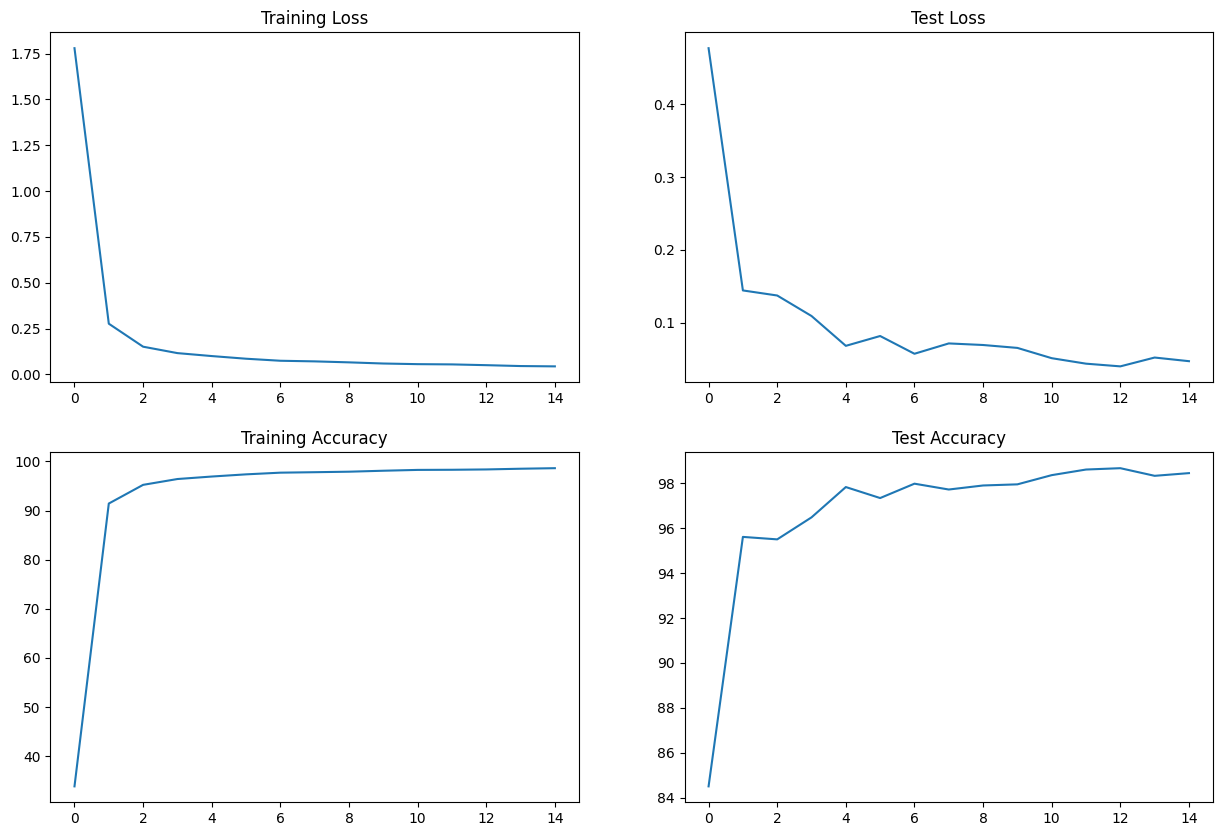

In [12]:
from utils import plot_stats
plot_stats()

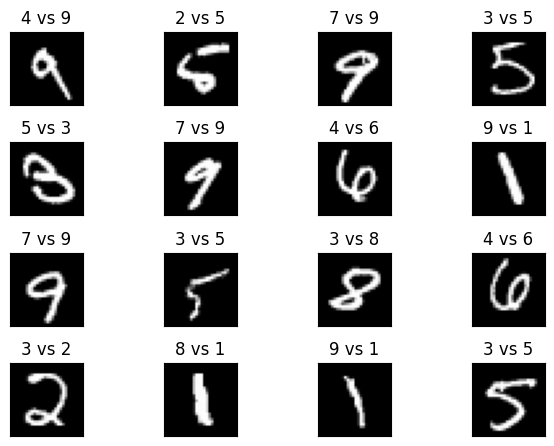

In [13]:
from utils import show_incorrect
show_incorrect() # Predicted vs Actual